In [1]:
import MDAnalysis as mda
import MDAnalysis.analysis.distances as dis
from MDAnalysis import *
import numpy as np
import matplotlib.pyplot as plt

/home/chem/mssnkt/anaconda3/envs/mda/lib/python2.7/site-packages/MDAnalysis/due.py:88: UserWarning: No module named mock
  warnings.warn(str(err))


# 2D EOS

In [2]:
# Cell
cells = np.loadtxt("./cell.dat")

In [3]:
nc = 10
str1 = "final_"
str3 = ".xyz"
br_br = np.zeros((nc,2))
f_h = np.zeros((nc,2))

for i in range(1,nc+1):
    str2=str(i) 
    ifile=str1+str2+str3
    u = mda.Universe(ifile)
    #print(i,u)

    # Br-Br bond length
    aI = u.select_atoms("name Br")
    aN = u.select_atoms("name Br")
    box = np.array(cells[i-1], dtype=np.float32)
    for ts in u.trajectory:
        bonds = dis.distance_array(aN.positions, aI.positions, box )
        allbonds = bonds.flatten()
        s_bonds= allbonds[np.logical_and(allbonds<=6.0,allbonds>=2.0)]
    
    m = np.mean(s_bonds)
    s = np.std(s_bonds)
    br_br[i-1,0] = m
    br_br[i-1,1] = s
    #print(i,m,s)

    # F-H bond length
    aI = u.select_atoms("name F")
    aN = u.select_atoms("name H")
    box = np.array(cells[i-1], dtype=np.float32)
    for ts in u.trajectory:
        bonds = dis.distance_array(aN.positions, aI.positions, box )
        allbonds = bonds.flatten()
        if (i <=7 ):
            s_bonds = allbonds[np.logical_and(allbonds<=3.0,allbonds>=1.5)]
        else:
            s_bonds = allbonds[np.logical_and(allbonds<=4.0,allbonds>=1.5)]
                
    m = np.mean(s_bonds)
    s = np.std(s_bonds)
    f_h[i-1,0] = m
    f_h[i-1,1] = s
    #print(i,m,s)

In [4]:
import pandas as pd
bb = pd.DataFrame(br_br,columns=["Br--Br Mean","Br--Br SD"])
fh = pd.DataFrame(f_h,columns=["F--H Mean","F--H SD"])
result = pd.concat([bb, fh], axis=1, sort=False)
print("Average Br--Br / F--H distances [angs]")
result

Average Br--Br / F--H distances [angs]


,Br--Br Mean,Br--Br SD,F--H Mean,F--H SD
0,3.743488,0.053536,2.274595,0.184860
1,3.863209,0.092618,2.383812,0.166976
2,3.993494,0.101714,2.508499,0.148588
3,4.139535,0.079659,2.636523,0.127481
4,4.130969,0.060199,2.834159,0.106502
5,4.267579,0.036200,2.814932,0.022119
6,4.444436,0.031695,2.967607,0.023684
7,4.657293,0.033612,3.359938,0.133164
8,4.863605,0.044753,3.560991,0.139757
9,5.098211,0.034217,3.754582,0.134981


In [5]:
e_cell = np.loadtxt("./data_fix_Z.dat")
ene = e_cell[:,2]
ene=ene-min(ene)

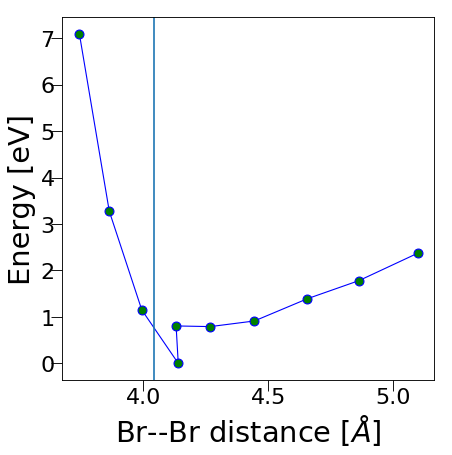

In [6]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(br_br[:,0], ene, color='blue', linestyle='solid', linewidth=1.0, label='')
plt.plot(br_br[:,0], ene, 'o', markerfacecolor='green', markersize=8, markeredgecolor='blue', linewidth=2.5, label='')
#plt.plot(xnew, f_cub_ave(xnew), color='purple', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('Br--Br distance [$\AA$]', fontsize=26)
plt.ylabel('Energy [eV]', fontsize=26)
#plt.legend()
plt.axvline(x=4.0410801793696516)
plt.show()

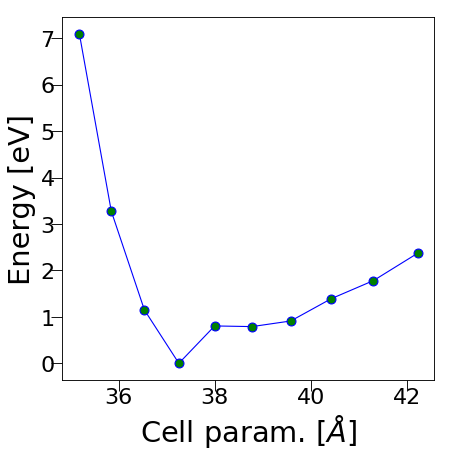

In [7]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(e_cell[:,1], ene, color='blue', linestyle='solid', linewidth=1.0, label='')
plt.plot(e_cell[:,1], ene, 'o', markerfacecolor='green', markersize=8, markeredgecolor='blue', linewidth=2.5, label='')
#plt.plot(xnew, f_cub_ave(xnew), color='purple', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('Cell param. [$\AA$]', fontsize=26)
plt.ylabel('Energy [eV]', fontsize=26)
#plt.legend()
#plt.axvline(x=2.8418088652969629)
plt.show()

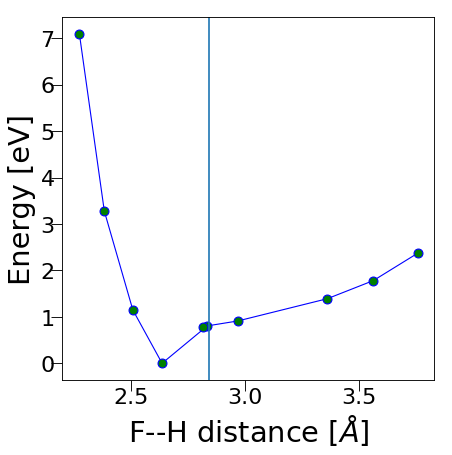

In [8]:
plt.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k') # figsize determine the actual size of the figure
plt.tick_params(axis='both', which='both', length=10.0, labelleft=True, labelbottom=True, labelsize=20.0)
plt.plot(f_h[:,0], ene, color='blue', linestyle='solid', linewidth=1.0, label='')
plt.plot(f_h[:,0], ene, 'o', markerfacecolor='green', markersize=8, markeredgecolor='blue', linewidth=2.5, label='')
#plt.plot(xnew, f_cub_ave(xnew), color='purple', linestyle='solid', linewidth=3.0, label='Ensemble average')
plt.xlabel('F--H distance [$\AA$]', fontsize=26)
plt.ylabel('Energy [eV]', fontsize=26)
#plt.legend()
plt.axvline(x=2.8418088652969629)
plt.show()

In [9]:
u = mda.Universe('./2d_eos.xyz')

('Br--Br', 4.1395349555496423, 0.079659171461259767)
('F--H (1)', 2.4703984253360973, 0.058882129554918776)
('F--H (2)', 2.7146567991764838, 0.056629116228020526)


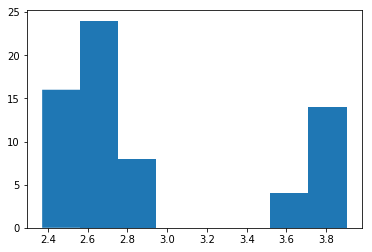

In [10]:
# Br-Br bond length
aI = u.select_atoms("name Br")
aN = u.select_atoms("name Br")
box = np.array([37.255, 37.255, 20.000, 90.000, 90.000, 60.000], dtype=np.float32)
for ts in u.trajectory:
    bonds = dis.distance_array(aN.positions, aI.positions, box )
    allbonds = bonds.flatten()
    s_bonds= allbonds[np.logical_and(allbonds>=3,allbonds<=4.5)]
    
#plt.hist(s_bonds, bins='auto')

m = np.mean(s_bonds)
s = np.std(s_bonds)
print("Br--Br",m,s)

# F-H bond length
aI = u.select_atoms("name F")
aN = u.select_atoms("name H")
box = np.array(cells[i-1], dtype=np.float32)
for ts in u.trajectory:
    bonds = dis.distance_array(aN.positions, aI.positions, box )
    allbonds = bonds.flatten()
    s_bonds = allbonds[np.logical_and(allbonds<=4.0,allbonds>=1.0)]

plt.hist(s_bonds, bins='auto')

# 2 different bond lengths for the F--H interactions
b1 = allbonds[np.logical_and(allbonds>=1.0,allbonds<=2.6)]
b2 = allbonds[np.logical_and(allbonds>=2.6,allbonds<=3.2)]
    

    
m = np.mean(b1)
s = np.std(b1)
print("F--H (1)",m,s)

m = np.mean(b2)
s = np.std(b2)
print("F--H (2)",m,s)

# Exp.

In [11]:
u = mda.Universe('./exp.xyz')

In [12]:
# Br-Br bond length
aI = u.select_atoms("name Br")
aN = u.select_atoms("name Br")
box = np.array([38.000, 38.000, 30.000, 90.000, 90.000, 60.000], dtype=np.float32)
for ts in u.trajectory:
    bonds = dis.distance_array(aN.positions, aI.positions, box )
    allbonds = bonds.flatten()
    s_bonds= allbonds[np.logical_and(allbonds>=3,allbonds<=5)]
    
m = np.mean(s_bonds)
s = np.std(s_bonds)
print("Br--Br",m,s)

# F-H bond length
aI = u.select_atoms("name F")
aN = u.select_atoms("name H")
box = np.array(cells[i-1], dtype=np.float32)
for ts in u.trajectory:
    bonds = dis.distance_array(aN.positions, aI.positions, box )
    allbonds = bonds.flatten()
    s_bonds = allbonds[np.logical_and(allbonds<=4.0,allbonds>=1.0)]

#plt.hist(s_bonds, bins='auto')

# 2 different bond lengths for the F--H interactions
b1 = allbonds[np.logical_and(allbonds>=1.0,allbonds<=2.8)]
b2 = allbonds[np.logical_and(allbonds>=2.8,allbonds<=4.0)]
    
m = np.mean(b1)
s = np.std(b1)
print("F--H (1)",m,s)

m = np.mean(b2)
s = np.std(b2)
print("F--H (2)",m,s)

('Br--Br', 4.0410801793696516, 0.01499153910507491)
('F--H (1)', 2.5413236494904186, 0.0027730381980478787)
('F--H (2)', 2.9920514732002346, 0.0071092211146445462)


# Cell Opt.

In [13]:
u = mda.Universe('./cell_opt.xyz')

('Br--Br', 4.2290126841662339, 0.05521942191842763)
('F--H (1)', 2.7845084713172912, 0.038518833075829158)
('F--H (2)', 3.0418528117245001, 0.031482848970796493)


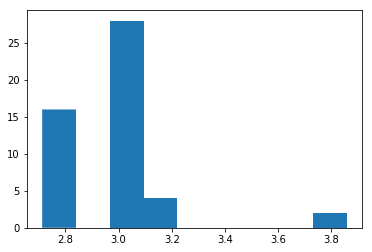

In [14]:
# Br-Br bond length
aI = u.select_atoms("name Br")
aN = u.select_atoms("name Br")
box = np.array([38.649, 38.387, 20.282, 90.224, 90.208, 60.210], dtype=np.float32)
for ts in u.trajectory:
    bonds = dis.distance_array(aN.positions, aI.positions, box )
    allbonds = bonds.flatten()
    s_bonds= allbonds[np.logical_and(allbonds>=3,allbonds<=5)]
    
m = np.mean(s_bonds)
s = np.std(s_bonds)
print("Br--Br",m,s)

# F-H bond length
aI = u.select_atoms("name F")
aN = u.select_atoms("name H")
box = np.array(cells[i-1], dtype=np.float32)
for ts in u.trajectory:
    bonds = dis.distance_array(aN.positions, aI.positions, box )
    allbonds = bonds.flatten()
    s_bonds = allbonds[np.logical_and(allbonds<=4.0,allbonds>=1.0)]

plt.hist(s_bonds, bins='auto')

# 2 different bond lengths for the F--H interactions
b1 = allbonds[np.logical_and(allbonds>=1.0,allbonds<=2.9)]
b2 = allbonds[np.logical_and(allbonds>=2.9,allbonds<=3.6)]
    
m = np.mean(b1)
s = np.std(b1)
print("F--H (1)",m,s)

m = np.mean(b2)
s = np.std(b2)
print("F--H (2)",m,s)

## Br--Br dimer, binding energy (SAM orientation)

We want to extract the equilibrium bond distance [$\mathring A$] and the corresponding energy [eV]

('Eps., Sigma', -0.067083121796642331, 3.7777091973024852)


/home/chem/mssnkt/anaconda3/envs/mda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:532: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/home/chem/mssnkt/anaconda3/envs/mda/lib/python2.7/site-packages/matplotlib/font_manager.py:1294: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


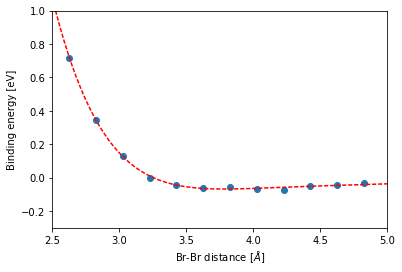

In [15]:
#import pysed
import os
import numpy as np
from scipy.spatial import distance
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']
import matplotlib.pyplot as plt
from matplotlib import pylab
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

nc=1
prefix="/storage/chem/mssnkt/HALO_SAMS/HARRY_P1/E_BINDING_Br_Br-F_H/Br_Br/RESULTS/"
end=".dat"
hartree_eV=float(27.2114)

fname="/storage/chem/mssnkt/HALO_SAMS/HARRY_P1/E_BINDING_Br_Br-F_H/Br_Br/RESULTS/results.dat"   # name of the file with the results
nl=sum((1 for i in open(fname, "rb"))) # n. of lines in the file
e_data=open(fname,"r")

#print(e_data)

# #dname="conf_"+str(i)+"_0.xyz" # configuration with the smallest A-B distance

# indexes - VMD numbering! i.e. VMD +2
idx1=0+2  # Br
idx2=19+2 # Br


x=[]
y=[]

counter =-1
for j in e_data: 
    l_data=j.split()
    energy=l_data[1]
    #print(counter,energy)
    if (counter == -1):
        e_mono_1 = energy
        #print(counter,energy)
    if (counter == 0):
        e_mono_2 = energy
        #print(counter,energy)
    if (counter > 0):
        k = counter-1
        xname=prefix+"conf_"+str(k)+".xyz"
        xyzf=open(xname,"r")
        lines=xyzf.readlines()
        xyzf.close()
        vv1=lines[idx1].split()
        vv2=lines[idx2].split()
        v1=np.array(vv1)[:]
        v1=np.delete(v1,0)
        v2=np.array(vv2)[:]
        v2=np.delete(v2,0)
        v1=v1.astype(np.float)
        v2=v2.astype(np.float)
        dist=distance.euclidean(v1,v2)
        x.append(dist)
        #print(counter,energy,e_mono_1,e_mono_2)
        # Binding energy [eV] = energy of the dimer - 2*energy of the monomer
        #print(counter,be)
        be=(float(energy)-(float(e_mono_1)+float(e_mono_2)))*hartree_eV
        y.append(be)
    counter = counter+1

x = np.array(x)
y = np.array(y)
x2 = x[x>2.5]
y2 = y[x>2.5]
z = np.polyfit(x2, y2, 7)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[len(x)-1], 500)
y_new = f(x_new)
epsilon=min(y_new)
sigma=x_new[np.argmin(y_new)]
print("Eps., Sigma",epsilon,sigma)

# plot
x_hb = x_new
y_hb = y_new
plt.plot(x2,y2,'o')
plt.plot(x_new, y_new,'r--')
#pylab.title('Hydrogen Bond energy')
pylab.xlabel('Br-Br distance [$\AA$]')
pylab.ylabel('Binding energy [eV]')
plt.rcParams["figure.figsize"] = (8,8)
plt.xlim(2.5,5.0)
plt.ylim(-0.3,1)
plt.legend()
plt.show()

# if i == 2:
#     x_halob = x_new
#     y_halob = y_new
#     plt.plot(x2,y2,'o')
#     plt.plot(x_new, y_new,'r--')
#     pylab.title('Halogen Bond energy')
#     pylab.xlabel('O-Br distance [$\AA$]')
#     pylab.ylabel('Binding energy [eV]')
#     plt.rcParams["figure.figsize"] = (8,8)
#     plt.xlim(1,4.5)
#     plt.ylim(-0.3,1)
#     plt.legend()
#     plt.show()

#e_data.close()

## F--H dimer, binding energy (SAM orientation)

### Set of F--H distances (1)

('Eps., Sigma', -0.20899696424595504, 2.5794596187707519)


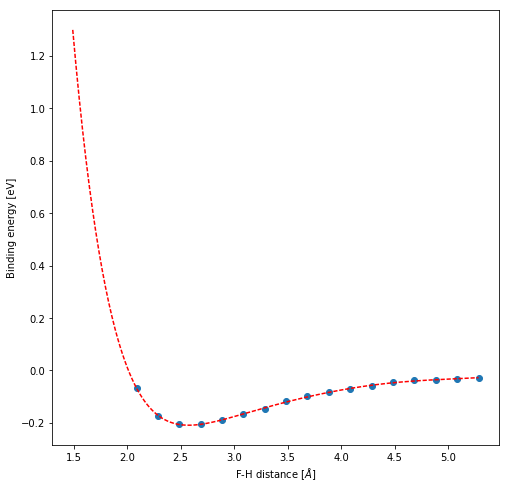

In [16]:
nc=1
prefix="/storage/chem/mssnkt/HALO_SAMS/HARRY_P1/E_BINDING_Br_Br-F_H/F_H/RESULTS/"
end=".dat"
hartree_eV=float(27.2114)

fname="/storage/chem/mssnkt/HALO_SAMS/HARRY_P1/E_BINDING_Br_Br-F_H/F_H/RESULTS/results.dat"   # name of the file with the results
nl=sum((1 for i in open(fname, "rb"))) # n. of lines in the file
e_data=open(fname,"r")

#print(e_data)

# #dname="conf_"+str(i)+"_0.xyz" # configuration with the smallest A-B distance

# indexes - VMD numbering! i.e. VMD +2
idx1=22+2  # 1+2  # H (3) for the 2nd set of distances
idx2=47+2 #45+2 # F 


x=[]
y=[]

counter =-1
for j in e_data: 
    l_data=j.split()
    energy=l_data[1]
    #print(counter,energy)
    if (counter == -1):
        e_mono_1 = energy
        #print(counter,energy)
    if (counter == 0):
        e_mono_2 = energy
        #print(counter,energy)
    if (counter > 0):
        k = counter-1
        xname=prefix+"conf_"+str(k)+".xyz"
        xyzf=open(xname,"r")
        lines=xyzf.readlines()
        xyzf.close()
        vv1=lines[idx1].split()
        vv2=lines[idx2].split()
        v1=np.array(vv1)[:]
        v1=np.delete(v1,0)
        v2=np.array(vv2)[:]
        v2=np.delete(v2,0)
        v1=v1.astype(np.float)
        v2=v2.astype(np.float)
        dist=distance.euclidean(v1,v2)
        x.append(dist)
        #print(counter,energy,e_mono_1,e_mono_2)
        # Binding energy [eV] = energy of the dimer - 2*energy of the monomer
        #print(counter,be)
        be=(float(energy)-(float(e_mono_1)+float(e_mono_2)))*hartree_eV
        y.append(be)
    counter = counter+1

x = np.array(x)
y = np.array(y)
x2 = x[x>2.0]
y2 = y[x>2.0]
z = np.polyfit(x2, y2, 7)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[len(x)-1], 500)
y_new = f(x_new)
epsilon=min(y_new)
sigma=x_new[np.argmin(y_new)]
print("Eps., Sigma",epsilon,sigma)

# plot
x_hb = x_new
y_hb = y_new
plt.plot(x2,y2,'o')
plt.plot(x_new, y_new,'r--')
#pylab.title('Hydrogen Bond energy')
pylab.xlabel('F-H distance [$\AA$]')
pylab.ylabel('Binding energy [eV]')
plt.rcParams["figure.figsize"] = (8,8)
#plt.xlim(2.5,5.0)
#plt.ylim(-0.3,1)
plt.legend()
plt.show()


### Set of F--H distances (2)

('Eps., Sigma', -0.20625075558200479, 2.7571862352500349)


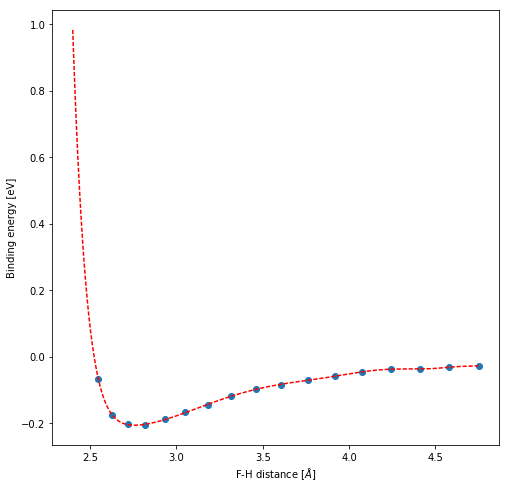

In [17]:
nc=1
prefix="/storage/chem/mssnkt/HALO_SAMS/HARRY_P1/E_BINDING_Br_Br-F_H/F_H/RESULTS/"
end=".dat"
hartree_eV=float(27.2114)

fname="/storage/chem/mssnkt/HALO_SAMS/HARRY_P1/E_BINDING_Br_Br-F_H/F_H/RESULTS/results.dat"   # name of the file with the results
nl=sum((1 for i in open(fname, "rb"))) # n. of lines in the file
e_data=open(fname,"r")

#print(e_data)

# #dname="conf_"+str(i)+"_0.xyz" # configuration with the smallest A-B distance

# indexes - VMD numbering! i.e. VMD +2
idx1=20+2 #3+2  # H (3) for the 2nd set of distances
idx2=47+2 #45+2 # F 


x=[]
y=[]

counter =-1
for j in e_data: 
    l_data=j.split()
    energy=l_data[1]
    #print(counter,energy)
    if (counter == -1):
        e_mono_1 = energy
        #print(counter,energy)
    if (counter == 0):
        e_mono_2 = energy
        #print(counter,energy)
    if (counter > 0):
        k = counter-1
        xname=prefix+"conf_"+str(k)+".xyz"
        xyzf=open(xname,"r")
        lines=xyzf.readlines()
        xyzf.close()
        vv1=lines[idx1].split()
        vv2=lines[idx2].split()
        v1=np.array(vv1)[:]
        v1=np.delete(v1,0)
        v2=np.array(vv2)[:]
        v2=np.delete(v2,0)
        v1=v1.astype(np.float)
        v2=v2.astype(np.float)
        dist=distance.euclidean(v1,v2)
        x.append(dist)
        #print(counter,energy,e_mono_1,e_mono_2)
        # Binding energy [eV] = energy of the dimer - 2*energy of the monomer
        #print(counter,be)
        be=(float(energy)-(float(e_mono_1)+float(e_mono_2)))*hartree_eV
        y.append(be)
    counter = counter+1

x = np.array(x)
y = np.array(y)
x2 = x[x>2.5]
y2 = y[x>2.5]
z = np.polyfit(x2, y2,12)
f = np.poly1d(z)
x_new = np.linspace(x[0], x[len(x)-1], 500)
y_new = f(x_new)
epsilon=min(y_new)
sigma=x_new[np.argmin(y_new)]
print("Eps., Sigma",epsilon,sigma)

# plot
x_hb = x_new
y_hb = y_new
plt.plot(x2,y2,'o')
plt.plot(x_new, y_new,'r--')
#pylab.title('Hydrogen Bond energy')
pylab.xlabel('F-H distance [$\AA$]')
pylab.ylabel('Binding energy [eV]')
plt.rcParams["figure.figsize"] = (8,8)
#plt.xlim(2.5,5.0)
#plt.ylim(-0.3,1)
plt.legend()
plt.show()


## The curious case of the odd (long!) Br--Br distance

Is the average Br--Br distance in the assembly much different (much larger) than the equilibrium distance of the Br--Br dimer (calculated in the same exp. config.?). And what about the F--H one(S)?

\begin{array}{l} 
\hline
                                   & \text{Exp.}      & \text{Cell_Opt.} & \text{2DEOS}    & \text{Equi (dimer)} \\
\hline
\text{Br--Br distance [angs]}      &  4.041 \pm 0.015 &  4.23 \pm 0.05   & (4.14 \pm 0.08) &  3.82 \pm 0.05 \text{ [-0.08 eV]} \\ 
\hline
\text{F--H distance (1) [angs]}    &  2.541 \pm 0.003 &  2.78 \pm 0.04   & (2.47 \pm 0.06) &  2.58 \pm 0.05 \text{ [-0.21 eV]} \\
\hline
\text{F--H distance (2) [angs]}    &  2.992 \pm 0.007 &  3.04 \pm 0.03   & (2.71 \pm 0.06) &  2.77 \pm 0.05 \text{ [-0.20 eV]} \\ 
\hline
\end{array}

In [18]:
import math

# In a nuthsell
* When doing a (crude) 2D EOS (keeping the symmetry of the cell as well as the z-component of the atomic positions fixed), the cell (and the Br--Br F--H distances as well) do not change much with respect to either the experimental data or the fully optimised (via DFT, no constraints) cell.
* Even as a result of said 2D EOS, the Br--Br distance does not go below 4.0 $\mathring A$ - which is still in a rather odd ballpark for a halogen bond interaction.
* According to the Br--Br (SAM orientation) binding energy curve, the Br--Br distance can, in principle, easily go down to 3.0 $\mathring A$ - albeit with minimal energy gain. That curve is very flat indeed (and the interaction is weak, -0.08 eV at its minimum). In fact, I even got two configurations with similar Br--Br distances and very different total energies. In other words, this SAM is not about Br--Br interactions at all! They don't get in the way, but they are not the main ingredient. The F--H are!
* According to the F--H (SAM orientation) binding energy, for one set of F--H distances (we have two!) one cannot go below 2.5 $\mathring A$, which constrains the geometry of the SAM - i.e. it cannot squeeze much! Note as well the the F--H binding energy curves are much deeper (~ -0.20 eV at their minima) than the Br--Br ones.
* The equilibrium Br--Br distance (~ 3.82 $\mathring A$) is much shorter than that we observe (both experimentally and via DFT) in the SAM, while the F--H distances are much more similar -- yet another indication that this SAM is all about F--HH interactions as opposed to Br--Br ones.